![](https://imgs.xkcd.com/comics/python.png)

# This is an Jupyter notebook hosted on Microsoft Azure.
Jupyter is an acronym for 'julia python r'. It supports numerous program languages and integrates with Github.

*Charles Becker, an unemployed student*

# What?!
*https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet*

This is my first live Jupyter (Python) notebook created from scratch.

*italics text* some _more italic text_

**really bold text here**

~~None of this around here~~

**_super special_**

now?

[Sonoma State University](http://sonoma.edu)



In [50]:
# not really sure what this is all about ... I think it has to do with display graphics
%pylab inline
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## A toy program

In [25]:
YourName = input("What's your name? ")
if len( YourName ) >0:
    print("Welcome to Hello World, " + YourName)
else:
    print("Okay, you're bashful.")

What's your name? 
Okay, you're bashful.


  City  Population
0  NYC     8000000
1   LA     6000000
2  Chi     4380000
3  Hou     4800000
4  Bzm       55000

Seaborn defaults===============================>


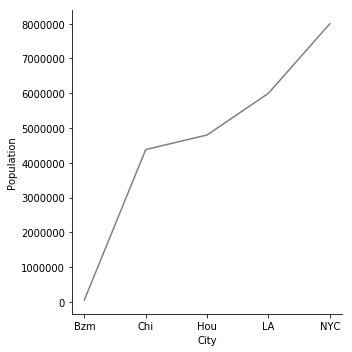

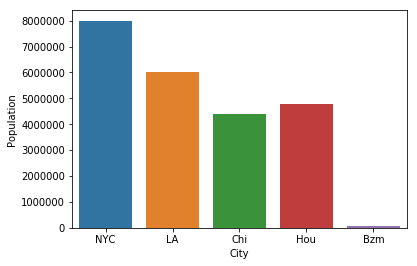


Matplotlib defaults============================>


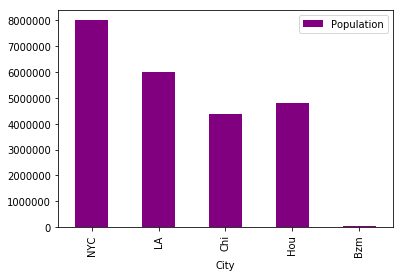

In [26]:
citydata = [['NYC', 8000000], ['LA', 6000000], ['Chi', 4380000],
    ['Hou', 4800000], ['Bzm', 55000]]
FirstDataFrame = pd.DataFrame(citydata, columns=['City', 'Population'])
print(FirstDataFrame)
print()

# using seaborn approach
print("Seaborn defaults===============================>")
sns.relplot(x="City", y="Population", data=FirstDataFrame, kind="line", color="gray")
plt.show()
plot1 = sns.barplot(x="City", y="Population", data=FirstDataFrame)
plt.show()
print()

# pandas (FirstDataFrame) having tight integration with matplotlib.pyplot
print("Matplotlib defaults============================>")
plot2 = FirstDataFrame.plot(kind = 'bar', x='City', y='Population', color="purple")
plt.show()

### Work with list processing a bit

In [27]:
myListOrig = [3,2,4,3,5,6,8,7]
print("Original " + str(myListOrig))
myListSquared = [i**2 for i in myListOrig]
print("Squared " + str(myListSquared))

Original [3, 2, 4, 3, 5, 6, 8, 7]
Squared [9, 4, 16, 9, 25, 36, 64, 49]


In [28]:
myListOrig = [3,2,4,3,5,6,8,7]
print("Original " + str(myListOrig))
myListSquared = []
for index in range(len(myListOrig)):
    myListSquared.append(myListOrig[index]**2)
print("Squared " + str(myListSquared))

Original [3, 2, 4, 3, 5, 6, 8, 7]
Squared [9, 4, 16, 9, 25, 36, 64, 49]


### Now work with some real data doing DS type stuffs
The data is in one file ('abalone.data') and the column names are a table in another document ('abalone.names').
Also, the data file contains an attribute, 'Sex', that is a categorical containing 'M', 'F', or 'I'.
'Abalone.names' contains a lot of explanatory free text, as well as a table defining the column names. First, I will assign those names to a list, then use that list when reading in the data file.  As you can see, the 'Sex' column contains categorical data.

In [119]:
colNames = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight',
            'Shell weight', 'Rings']
rawAbDat = pd.read_csv("abalone.data", names=colNames )
rawAbDat.tail(12)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4165,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,7
4166,I,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.1560,10
4167,M,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,9
4168,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
4169,M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


### Now to add approprite dummy variables
The convolution here is that 'get_dummies' drops the original column, so first I save that
column to a list, use get_dummies, and then add the original column back in.

In [127]:
sexColumn = rawAbDat['Sex']
abDatWDummies = pd.get_dummies(rawAbDat,columns=['Sex'])
abDatWDummies['Sex'] = sexColumn
abDatWDummies.tail(12)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M,Sex
4165,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,7,0,1,0,I
4166,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.1560,10,0,1,0,I
4167,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,9,0,0,1,M
4168,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8,1,0,0,F
4169,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10,0,0,1,M
4170,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10,0,0,1,M
4171,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8,0,0,1,M
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0,F
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1,M
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1,M


In [128]:
print(abDatWDummies["Length"].max())

0.815


In [129]:
print( abDatWDummies[["Length", "Rings"]].describe() )
print("SKEWDNESS")
print( abDatWDummies[["Length", "Rings"]].skew() )
print("KURTOSIS")
print( abDatWDummies[["Length", "Rings"]].kurt() )

            Length        Rings
count  4177.000000  4177.000000
mean      0.523992     9.933684
std       0.120093     3.224169
min       0.075000     1.000000
25%       0.450000     8.000000
50%       0.545000     9.000000
75%       0.615000    11.000000
max       0.815000    29.000000
SKEWDNESS
Length   -0.639873
Rings     1.114102
dtype: float64
KURTOSIS
Length    0.064621
Rings     2.330687
dtype: float64


# Next I will run a simple linear regression
Dependent variable will be "WholeWeight"
Independent variable will begin with "Rings" and hopefully progress to add my predictors
with luck ending in an MLR-type situation.

Note that 'statsmodel.api as sm' is the correct import statement to access the '.OLS' method.
Unlike R, you have to add 'sm.add_constant()' to get the intercept value.

In [130]:
en1 = abDatWDummies['Whole weight']
ex1 = sm.add_constant(abDatWDummies['Rings'])
abRes = sm.OLS(en1, ex1).fit()
print(abRes.summary())

                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1722.
Date:                Mon, 13 May 2019   Prob (F-statistic):          1.89e-315
Time:                        06:14:59   Log-Likelihood:                -2228.8
No. Observations:                4177   AIC:                             4462.
Df Residuals:                    4175   BIC:                             4474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0123      0.021      0.593      0.5

### Plot it

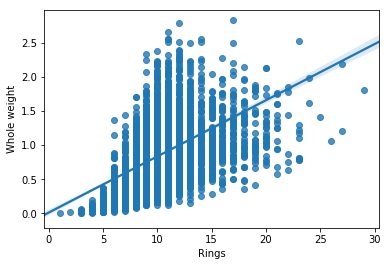

In [132]:
sns.regplot(x='Rings', y='Whole weight', data=abDatWDummies)

# Now for a multiple linear regression
'WholeWeight' still the dependent variable
'Rings' + 'Sex' are the predictors

In [133]:
abResult = sm.OLS(abDatWDummies['Whole weight'], sm.add_constant(abDatWDummies[['Rings', 'Sex_F', 'Sex_I']])).fit()
print(abResult.summary())

# save abDat_sex_dum dataset to a file "just because"
abDatWDummies.to_csv("abDatWDummies.csv")

                            OLS Regression Results                            
Dep. Variable:           Whole weight   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1010.
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        06:15:43   Log-Likelihood:                -1809.9
No. Observations:                4177   AIC:                             3628.
Df Residuals:                    4173   BIC:                             3653.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3967      0.023     16.956      0.0

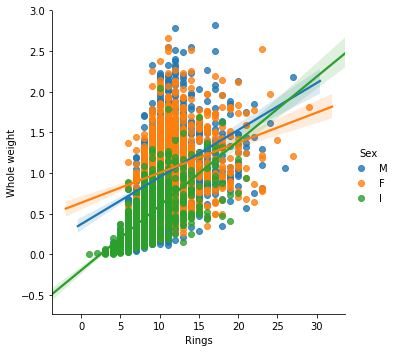

In [134]:
sns.lmplot(x='Rings', y='Whole weight', data=abDatWDummies, hue='Sex')